In [82]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import math

In [19]:
# load species name -> species id lookup dict
name_to_id_df = pd.read_csv('species codes.csv', encoding='unicode_escape')
name_to_id_dict = {}
for _, row in name_to_id_df.iterrows():
    name_to_id_dict["{}- {}".format(row['species_primary_common_name'], row['species_scientific_name'])] = row['species_id']
    name_to_id_dict["{}-{}".format(row['species_primary_common_name'], row['species_scientific_name'])] = row['species_id']

In [64]:
ref_df = pd.read_csv('reference_data/pvt_kerala.csv')
cit_df = pd.read_csv('citizen_data/Kerala_citizenData.csv')

In [65]:
cit_df.head()

,Date_of_observation,Species_name,Leaves_fresh,Leaves_mature,Leaves_old,Flowers_bud,Flowers_open,Flowers_male,Flowers_Female,Fruits_unripe,Fruits_ripe,Fruits_open,Year,Week
0,2020-10-13,Aabehayat Mango- Mangifera indica,2.0,2.0,1.0,0.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,2020,36
1,2021-03-02,Aabehayat Mango- Mangifera indica,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2021,7
2,2021-11-23,Aabehayat Mango- Mangifera indica,1.0,2.0,1.0,0.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,2021,42
3,2021-11-24,Aabehayat Mango- Mangifera indica,1.0,2.0,1.0,1.0,1.0,-2.0,-2.0,0.0,0.0,-2.0,2021,42
4,2021-03-09,Aabehayat Mango- Mangifera indica,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2021,8


In [66]:
ref_df.head()

,Unnamed: 0,id,species_id,species_name,updated_at,week,Leaves_fresh,Leaves_mature,Leaves_old,Flowers_bud,Flowers_open,Flowers_male,Flowers_Female,Fruits_unripe,Fruits_ripe,Fruits_open
0,0,1,1001,NaN,NaN,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
1,1,1,1001,NaN,NaN,1,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
2,2,1,1001,NaN,NaN,2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
3,3,1,1001,NaN,NaN,3,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
4,4,1,1001,NaN,NaN,4,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2


In [67]:
len(cit_df), len(ref_df)

(487201, 11472)

In [68]:
cit_df['Species_name'].value_counts()

Species_name
Jackfruit- Artocarpus heterophyllus              79736
Mango (all varieties)- Mangifera indica          76274
Teak- Tectona grandis                            26293
Tamarind- Tamarindus indica                      25411
Indian laburnum- Cassia fistula                  22688
                                                 ...  
Olour Mango- Mangifera indica                        1
Meethabhaji-Champereia manillana                     1
Chinar-Platanus orientalis                           1
Bhimal-Grewia optiva                                 1
Himalayan rhododendron- Rhododendron arboreum        1
Name: count, Length: 169, dtype: int64

In [108]:
# get id of Jackfruit- Artocarpus heterophyllus
species_name = 'Jackfruit- Artocarpus heterophyllus'
species_id = name_to_id_dict['Jackfruit- Artocarpus heterophyllus']
jack_df = cit_df[cit_df['Species_name'] == 'Jackfruit- Artocarpus heterophyllus']

array([2017, 2015, 2019, 2020, 2023, 2022, 2016, 2021, 2014, 2018])

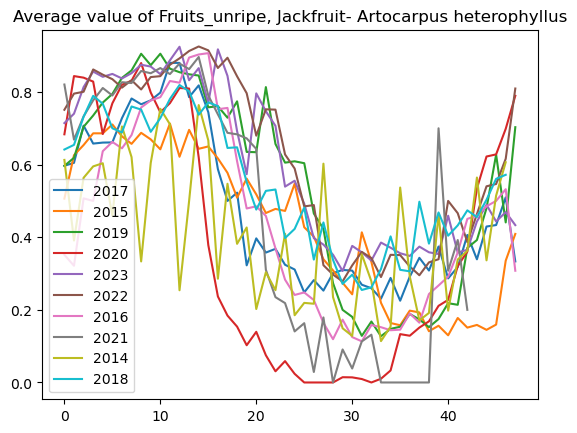

In [130]:
# plot percentage of observations with attr recorded
def condense_positives(val):
    if val > 1:
        return 1
    return val

attr = 'Fruits_unripe'
for year in jack_df['Year'].unique():
    jack_df_year = jack_df[jack_df['Year'] == year]
    attr_week_pairs = []
    for week in range(48):
        jack_df_year_week = jack_df_year[jack_df_year['Week'] == week]
        attr_arr = np.array(jack_df_year_week[attr])
        attr_arr = attr_arr[~np.isnan(attr_arr)]
        attr_arr = np.array(list(map(condense_positives, list(attr_arr))))
        attr_arr = list(filter(lambda x: x >= 0, list(attr_arr)))
        if len(attr_arr) > 0:
            mean = np.mean(attr_arr)
            std = math.sqrt(np.mean((attr_arr - mean)**2))
            attr_week_pairs.append((week, mean, std))
    weeks = list(map(lambda t: t[0], attr_week_pairs))
    means = list(map(lambda t: t[1], attr_week_pairs))
    plt.plot(weeks, means, label=year)

plt.title("Average value of {}, {}".format(attr, species_name))
plt.legend()
plt.show()

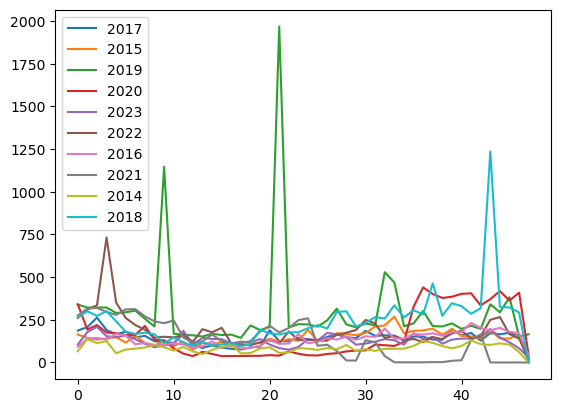

In [138]:
# plot total number of observations per week for jackfruit in Kerala
for year in jack_df['Year'].unique():
    weeks = list(range(48))
    nobs = list()
    for week in range(48):
        jack_df_year = jack_df[jack_df['Year'] == year]
        jack_df_year_week = jack_df_year[jack_df_year['Week'] == week]
        nobs.append(len(jack_df_year_week))
    plt.plot(weeks, nobs, label=year)
plt.legend()
plt.show()

In [140]:
# for jackfruit, get average week where phenophase switches from fruits_ripe to fruits_unripe


,Date_of_observation,Species_name,Leaves_fresh,Leaves_mature,Leaves_old,Flowers_bud,Flowers_open,Flowers_male,Flowers_Female,Fruits_unripe,Fruits_ripe,Fruits_open,Year,Week
0,2020-10-13,Aabehayat Mango- Mangifera indica,2.0,2.0,1.0,0.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,2020,36
1,2021-03-02,Aabehayat Mango- Mangifera indica,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2021,7
2,2021-11-23,Aabehayat Mango- Mangifera indica,1.0,2.0,1.0,0.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,2021,42
3,2021-11-24,Aabehayat Mango- Mangifera indica,1.0,2.0,1.0,1.0,1.0,-2.0,-2.0,0.0,0.0,-2.0,2021,42
4,2021-03-09,Aabehayat Mango- Mangifera indica,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2021,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487196,2019-05-28,Yellow-silk cotton tree- Cochlospermum religiosum,2.0,2.0,1.0,1.0,1.0,-2.0,-2.0,0.0,0.0,-2.0,2019,19
487197,2023-10-01,Yellow-silk cotton tree- Cochlospermum religiosum,2.0,2.0,0.0,2.0,2.0,-2.0,-2.0,1.0,1.0,-2.0,2023,35
487198,2023-04-01,Yellow-silk cotton tree- Cochlospermum religiosum,1.0,2.0,1.0,2.0,1.0,-2.0,-2.0,0.0,0.0,-2.0,2023,11
487199,2019-03-17,Yellow-silk cotton tree- Cochlospermum religiosum,2.0,2.0,1.0,2.0,2.0,-2.0,-2.0,0.0,0.0,-2.0,2019,9
